In [63]:
import numpy as np
import pandas as pd
from keras.datasets import mnist
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dropout
from keras.utils import to_categorical

# 指定亂數種子
seed = 7
np.random.seed(seed)
# 載入資料集
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# 將圖片轉換成 4D 張量
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
# 因為是固定範圍, 所以執行正規化, 從 0-255 至 0-1
X_train = X_train / 255
X_test = X_test / 255
# One-hot編碼
Y_test_bk = Y_test.copy()
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)


In [64]:
# 定義模型
model = Sequential()

model = load_model("./data/mnist.h5")

model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])

Y_pred = model.predict_classes(X_test)


In [68]:
print(Y_pred)

[7 2 1 ... 4 5 6]


In [69]:
tb = pd.crosstab(Y_test_bk.astype(int), Y_pred.astype(int),
                rownames = ["label"], colnames = ["predict"])
print(tb)

predict    0     1     2     3    4    5    6     7    8    9
label                                                        
0        975     0     1     0    0    0    2     1    1    0
1          0  1131     1     2    0    0    1     0    0    0
2          0     0  1031     0    0    0    0     1    0    0
3          0     0     0  1006    0    2    0     0    2    0
4          0     0     1     0  978    0    0     1    0    2
5          1     0     0     8    0  881    1     0    0    1
6          4     2     0     0    2    0  947     0    3    0
7          0     2    11     2    0    0    0  1011    1    1
8          0     0     3     1    0    0    0     0  969    1
9          1     1     1     2    8    2    0     2    2  990


In [70]:
import matplotlib.pyplot as plt
%matplotlib inline
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
wrong_i = []
plt.figure()
for j in range(10000):
    X_test_digit = X_test[j].reshape(1,28,28,1).astype("float32")
    X_test_digit = X_test_digit / 255
    probs = model.predict_proba(X_test_digit, batch_size = 1)
    if Y_test_bk[j] != np.argmax(probs):
        wrong_i.append(j)
    
print(wrong_i)


[247, 259, 445, 582, 625, 674, 684, 947, 1014, 1039, 1226, 1232, 1260, 1299, 1393, 1522, 1527, 1621, 1709, 1754, 1878, 1901, 2035, 2129, 2130, 2135, 2182, 2293, 2414, 2447, 2454, 2582, 2597, 2654, 2939, 2953, 2970, 2995, 3073, 3422, 3520, 3558, 3762, 3767, 3808, 3869, 4078, 4176, 4238, 4259, 4284, 4360, 4497, 4500, 4690, 4740, 4823, 5937, 5955, 5973, 5997, 6166, 6173, 6505, 6571, 6576, 6597, 6625, 6651, 6783, 8316, 8325, 9009, 9015, 9019, 9024, 9036, 9587, 9634, 9669, 9729]


<Figure size 432x288 with 0 Axes>

In [71]:
print(len(wrong_i))

81


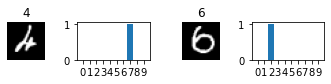

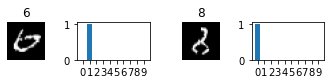

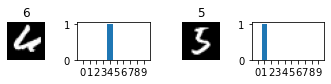

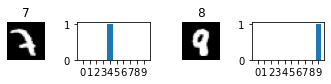

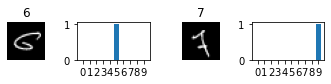

In [95]:

import matplotlib.pyplot as plt
%matplotlib inline

i = 0
m = 1
for k in range(1,6):
    plt.figure()
    digit = X_test[wrong_i[i]].reshape(28,28)
    X_test_digit = X_test[i].reshape(1,28,28,1).astype("float32")
    X_test_digit = X_test_digit / 255
    plt.subplot(5,4,m)
    m +=1
    plt.title( str(Y_test_bk[wrong_i[i]]))
    plt.imshow(digit,cmap = "gray")
    plt.axis("off")

    #print("Predicting ...")
    probs = model.predict_proba(X_test_digit, batch_size = 1)
    #print(probs)
    #print(type(probs))
    #print(np.argmax(probs))
    plt.subplot(5,4,m)
    m +=1
    #plt.title("Probabilities for Each Digit Class")
    plt.bar(np.arange(10), probs.reshape(10), align = "center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))

    i = i + 1

    digit = X_test[wrong_i[i]].reshape(28,28)
    X_test_digit = X_test[i].reshape(1,28,28,1).astype("float32")
    X_test_digit = X_test_digit / 255
    plt.subplot(5,4,m)
    m +=1
    plt.title( str(Y_test_bk[wrong_i[i]]))
    plt.imshow(digit,cmap = "gray")
    plt.axis("off")

    #print("Predicting ...")
    probs = model.predict_proba(X_test_digit, batch_size = 1)
    #print(probs)
    #print(type(probs))
    #print(np.argmax(probs))
    plt.subplot(5,4,m)
    m +=1
    #plt.title("Probabilities for Each Digit Class")
    plt.bar(np.arange(10), probs.reshape(10), align = "center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))
    i = i+1

    plt.show()
    

In [96]:
print(i)

10


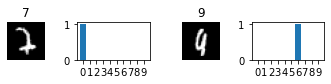

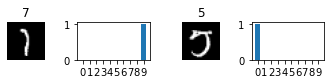

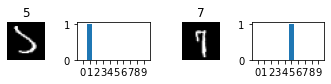

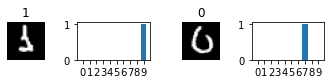

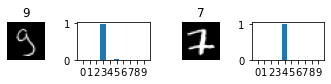

20


In [97]:

import matplotlib.pyplot as plt
%matplotlib inline
m = 1

for k in range(1,6):
    plt.figure()
    digit = X_test[wrong_i[i]].reshape(28,28)
    X_test_digit = X_test[i].reshape(1,28,28,1).astype("float32")
    X_test_digit = X_test_digit / 255
    plt.subplot(5,4,m)
    m +=1
    plt.title( str(Y_test_bk[wrong_i[i]]))
    plt.imshow(digit,cmap = "gray")
    plt.axis("off")

    #print("Predicting ...")
    probs = model.predict_proba(X_test_digit, batch_size = 1)
    #print(probs)
    #print(type(probs))
    #print(np.argmax(probs))
    plt.subplot(5,4,m)
    m +=1
    #plt.title("Probabilities for Each Digit Class")
    plt.bar(np.arange(10), probs.reshape(10), align = "center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))

    i = i + 1

    digit = X_test[wrong_i[i]].reshape(28,28)
    X_test_digit = X_test[i].reshape(1,28,28,1).astype("float32")
    X_test_digit = X_test_digit / 255
    plt.subplot(5,4,m)
    m +=1
    plt.title( str(Y_test_bk[wrong_i[i]]))
    plt.imshow(digit,cmap = "gray")
    plt.axis("off")

    #print("Predicting ...")
    probs = model.predict_proba(X_test_digit, batch_size = 1)
    #print(probs)
    #print(type(probs))
    #print(np.argmax(probs))
    plt.subplot(5,4,m)
    m +=1
    #plt.title("Probabilities for Each Digit Class")
    plt.bar(np.arange(10), probs.reshape(10), align = "center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))
    i = i+1

    plt.show()
print(i)

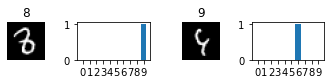

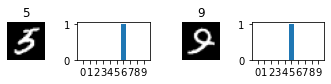

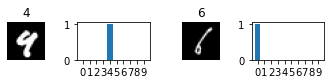

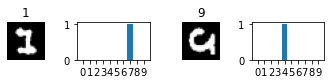

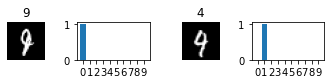

30


In [98]:

import matplotlib.pyplot as plt
%matplotlib inline
m = 1

for k in range(1,6):
    plt.figure()
    digit = X_test[wrong_i[i]].reshape(28,28)
    X_test_digit = X_test[i].reshape(1,28,28,1).astype("float32")
    X_test_digit = X_test_digit / 255
    plt.subplot(5,4,m)
    m +=1
    plt.title( str(Y_test_bk[wrong_i[i]]))
    plt.imshow(digit,cmap = "gray")
    plt.axis("off")

    #print("Predicting ...")
    probs = model.predict_proba(X_test_digit, batch_size = 1)
    #print(probs)
    #print(type(probs))
    #print(np.argmax(probs))
    plt.subplot(5,4,m)
    m +=1
    #plt.title("Probabilities for Each Digit Class")
    plt.bar(np.arange(10), probs.reshape(10), align = "center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))

    i = i + 1

    digit = X_test[wrong_i[i]].reshape(28,28)
    X_test_digit = X_test[i].reshape(1,28,28,1).astype("float32")
    X_test_digit = X_test_digit / 255
    plt.subplot(5,4,m)
    m +=1
    plt.title( str(Y_test_bk[wrong_i[i]]))
    plt.imshow(digit,cmap = "gray")
    plt.axis("off")

    #print("Predicting ...")
    probs = model.predict_proba(X_test_digit, batch_size = 1)
    #print(probs)
    #print(type(probs))
    #print(np.argmax(probs))
    plt.subplot(5,4,m)
    m +=1
    #plt.title("Probabilities for Each Digit Class")
    plt.bar(np.arange(10), probs.reshape(10), align = "center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))
    i = i+1

    plt.show()
print(i)


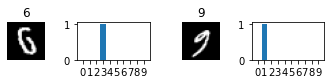

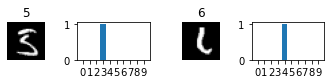

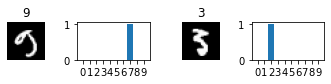

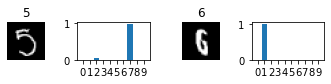

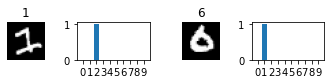

40


In [99]:

import matplotlib.pyplot as plt
%matplotlib inline
m = 1

for k in range(1,6):
    plt.figure()
    digit = X_test[wrong_i[i]].reshape(28,28)
    X_test_digit = X_test[i].reshape(1,28,28,1).astype("float32")
    X_test_digit = X_test_digit / 255
    plt.subplot(5,4,m)
    m +=1
    plt.title( str(Y_test_bk[wrong_i[i]]))
    plt.imshow(digit,cmap = "gray")
    plt.axis("off")

    #print("Predicting ...")
    probs = model.predict_proba(X_test_digit, batch_size = 1)
    #print(probs)
    #print(type(probs))
    #print(np.argmax(probs))
    plt.subplot(5,4,m)
    m +=1
    #plt.title("Probabilities for Each Digit Class")
    plt.bar(np.arange(10), probs.reshape(10), align = "center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))

    i = i + 1

    digit = X_test[wrong_i[i]].reshape(28,28)
    X_test_digit = X_test[i].reshape(1,28,28,1).astype("float32")
    X_test_digit = X_test_digit / 255
    plt.subplot(5,4,m)
    m +=1
    plt.title( str(Y_test_bk[wrong_i[i]]))
    plt.imshow(digit,cmap = "gray")
    plt.axis("off")

    #print("Predicting ...")
    probs = model.predict_proba(X_test_digit, batch_size = 1)
    #print(probs)
    #print(type(probs))
    #print(np.argmax(probs))
    plt.subplot(5,4,m)
    m +=1
    #plt.title("Probabilities for Each Digit Class")
    plt.bar(np.arange(10), probs.reshape(10), align = "center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))
    i = i+1

    plt.show()
print(i)

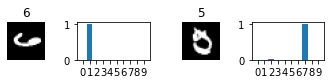

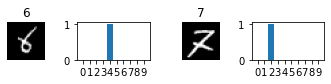

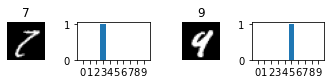

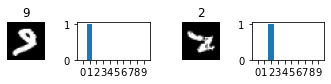

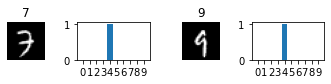

50


In [100]:

import matplotlib.pyplot as plt
%matplotlib inline
m = 1

for k in range(1,6):
    plt.figure()
    digit = X_test[wrong_i[i]].reshape(28,28)
    X_test_digit = X_test[i].reshape(1,28,28,1).astype("float32")
    X_test_digit = X_test_digit / 255
    plt.subplot(5,4,m)
    m +=1
    plt.title( str(Y_test_bk[wrong_i[i]]))
    plt.imshow(digit,cmap = "gray")
    plt.axis("off")

    #print("Predicting ...")
    probs = model.predict_proba(X_test_digit, batch_size = 1)
    #print(probs)
    #print(type(probs))
    #print(np.argmax(probs))
    plt.subplot(5,4,m)
    m +=1
    #plt.title("Probabilities for Each Digit Class")
    plt.bar(np.arange(10), probs.reshape(10), align = "center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))

    i = i + 1

    digit = X_test[wrong_i[i]].reshape(28,28)
    X_test_digit = X_test[i].reshape(1,28,28,1).astype("float32")
    X_test_digit = X_test_digit / 255
    plt.subplot(5,4,m)
    m +=1
    plt.title( str(Y_test_bk[wrong_i[i]]))
    plt.imshow(digit,cmap = "gray")
    plt.axis("off")

    #print("Predicting ...")
    probs = model.predict_proba(X_test_digit, batch_size = 1)
    #print(probs)
    #print(type(probs))
    #print(np.argmax(probs))
    plt.subplot(5,4,m)
    m +=1
    #plt.title("Probabilities for Each Digit Class")
    plt.bar(np.arange(10), probs.reshape(10), align = "center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))
    i = i+1

    plt.show()
print(i)

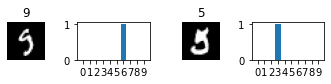

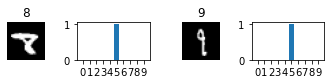

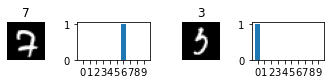

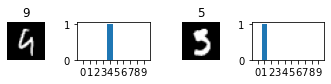

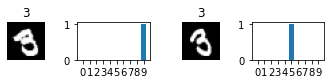

60


In [101]:

import matplotlib.pyplot as plt
%matplotlib inline
m = 1

for k in range(1,6):
    plt.figure()
    digit = X_test[wrong_i[i]].reshape(28,28)
    X_test_digit = X_test[i].reshape(1,28,28,1).astype("float32")
    X_test_digit = X_test_digit / 255
    plt.subplot(5,4,m)
    m +=1
    plt.title( str(Y_test_bk[wrong_i[i]]))
    plt.imshow(digit,cmap = "gray")
    plt.axis("off")

    #print("Predicting ...")
    probs = model.predict_proba(X_test_digit, batch_size = 1)
    #print(probs)
    #print(type(probs))
    #print(np.argmax(probs))
    plt.subplot(5,4,m)
    m +=1
    #plt.title("Probabilities for Each Digit Class")
    plt.bar(np.arange(10), probs.reshape(10), align = "center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))

    i = i + 1

    digit = X_test[wrong_i[i]].reshape(28,28)
    X_test_digit = X_test[i].reshape(1,28,28,1).astype("float32")
    X_test_digit = X_test_digit / 255
    plt.subplot(5,4,m)
    m +=1
    plt.title( str(Y_test_bk[wrong_i[i]]))
    plt.imshow(digit,cmap = "gray")
    plt.axis("off")

    #print("Predicting ...")
    probs = model.predict_proba(X_test_digit, batch_size = 1)
    #print(probs)
    #print(type(probs))
    #print(np.argmax(probs))
    plt.subplot(5,4,m)
    m +=1
    #plt.title("Probabilities for Each Digit Class")
    plt.bar(np.arange(10), probs.reshape(10), align = "center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))
    i = i+1

    plt.show()
print(i)

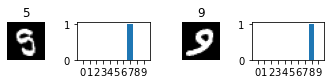

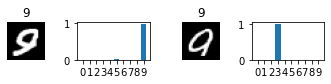

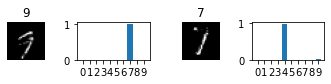

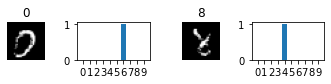

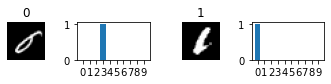

70


In [102]:

import matplotlib.pyplot as plt
%matplotlib inline
m = 1

for k in range(1,6):
    plt.figure()
    digit = X_test[wrong_i[i]].reshape(28,28)
    X_test_digit = X_test[i].reshape(1,28,28,1).astype("float32")
    X_test_digit = X_test_digit / 255
    plt.subplot(5,4,m)
    m +=1
    plt.title( str(Y_test_bk[wrong_i[i]]))
    plt.imshow(digit,cmap = "gray")
    plt.axis("off")

    #print("Predicting ...")
    probs = model.predict_proba(X_test_digit, batch_size = 1)
    #print(probs)
    #print(type(probs))
    #print(np.argmax(probs))
    plt.subplot(5,4,m)
    m +=1
    #plt.title("Probabilities for Each Digit Class")
    plt.bar(np.arange(10), probs.reshape(10), align = "center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))

    i = i + 1

    digit = X_test[wrong_i[i]].reshape(28,28)
    X_test_digit = X_test[i].reshape(1,28,28,1).astype("float32")
    X_test_digit = X_test_digit / 255
    plt.subplot(5,4,m)
    m +=1
    plt.title( str(Y_test_bk[wrong_i[i]]))
    plt.imshow(digit,cmap = "gray")
    plt.axis("off")

    #print("Predicting ...")
    probs = model.predict_proba(X_test_digit, batch_size = 1)
    #print(probs)
    #print(type(probs))
    #print(np.argmax(probs))
    plt.subplot(5,4,m)
    m +=1
    #plt.title("Probabilities for Each Digit Class")
    plt.bar(np.arange(10), probs.reshape(10), align = "center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))
    i = i+1

    plt.show()
print(i)

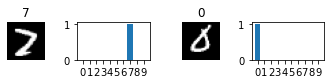

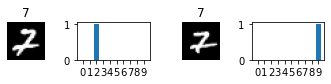

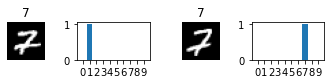

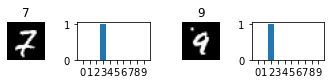

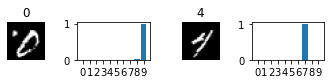

80


In [103]:

import matplotlib.pyplot as plt
%matplotlib inline
m = 1

for k in range(1,6):
    plt.figure()
    digit = X_test[wrong_i[i]].reshape(28,28)
    X_test_digit = X_test[i].reshape(1,28,28,1).astype("float32")
    X_test_digit = X_test_digit / 255
    plt.subplot(5,4,m)
    m +=1
    plt.title( str(Y_test_bk[wrong_i[i]]))
    plt.imshow(digit,cmap = "gray")
    plt.axis("off")

    #print("Predicting ...")
    probs = model.predict_proba(X_test_digit, batch_size = 1)
    #print(probs)
    #print(type(probs))
    #print(np.argmax(probs))
    plt.subplot(5,4,m)
    m +=1
    #plt.title("Probabilities for Each Digit Class")
    plt.bar(np.arange(10), probs.reshape(10), align = "center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))

    i = i + 1

    digit = X_test[wrong_i[i]].reshape(28,28)
    X_test_digit = X_test[i].reshape(1,28,28,1).astype("float32")
    X_test_digit = X_test_digit / 255
    plt.subplot(5,4,m)
    m +=1
    plt.title( str(Y_test_bk[wrong_i[i]]))
    plt.imshow(digit,cmap = "gray")
    plt.axis("off")

    #print("Predicting ...")
    probs = model.predict_proba(X_test_digit, batch_size = 1)
    #print(probs)
    #print(type(probs))
    #print(np.argmax(probs))
    plt.subplot(5,4,m)
    m +=1
    #plt.title("Probabilities for Each Digit Class")
    plt.bar(np.arange(10), probs.reshape(10), align = "center")
    plt.xticks(np.arange(10),np.arange(10).astype(str))
    i = i+1

    plt.show()
print(i)

80


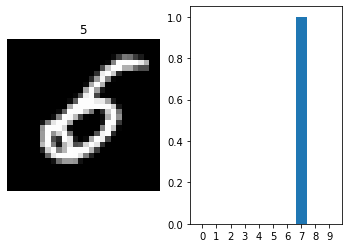

In [106]:

import matplotlib.pyplot as plt
%matplotlib inline

i = 80

plt.figure()
digit = X_test[wrong_i[i]].reshape(28,28)
X_test_digit = X_test[i].reshape(1,28,28,1).astype("float32")
X_test_digit = X_test_digit / 255
plt.subplot(1,2,m)
m +=1
plt.title( str(Y_test_bk[wrong_i[i]]))
plt.imshow(digit,cmap = "gray")
plt.axis("off")

#print("Predicting ...")
probs = model.predict_proba(X_test_digit, batch_size = 1)
#print(probs)
#print(type(probs))
#print(np.argmax(probs))
plt.subplot(1,2,m)
m +=1
#plt.title("Probabilities for Each Digit Class")
plt.bar(np.arange(10), probs.reshape(10), align = "center")
plt.xticks(np.arange(10),np.arange(10).astype(str))


print(i)